In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Interpolação

Nesta aula estudaremos métodos de interpolação de funções de uma variável. Dado um conjunto de valores de uma função $y = f(x)$ nos pontos ordenados $x_0$, $x_1$,..., $x_n$, nosso objetivo é encontrar $f(x)$ para um valor arbitrário de $x$. Quando $x_0 \leq x \leq x_n$, este é um problema de interpolação. Se $x < x_0$ ou $x_n < x$, então este é um problema de extrapolação.

Existem diversos métodos para solucionar problemas de interpolação, cada método com suas características de precisão, eficiência, suavidade, quantidade de dados necessária, entre outras. Todas essas características são levadas em conta, na escolha de um método de interpolação.

Independentemente do método de interpolação, o resultado é uma função ou mais funções definidas no intervalo $[x_0,x_n]$ que, idealmente, reproduzem a função $y$ original. Esta função (ou conjunto de funções) é chamada de **interpolante**.

Como exemplo, considere os pontos abaixo como pontos conhecidos de uma função $y = f(x)$.

In [2]:
# Definir pontos iniciais
x = np.arange(2, 9)
y = np.cos(x)

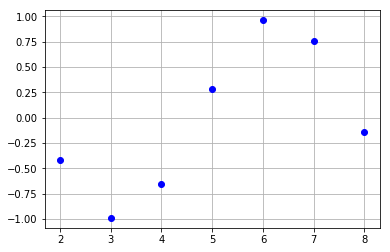

In [3]:
# Gráfico
plt.plot(x, y, 'bo')
plt.grid(True)

## Interpolação Constante

Este é o método mais simples de interpolação. Neste método, o valor da função $f(x)$ para um $x$ arbitrário será exatamente o valor da função no ponto mais próximo.

A maior vantagem deste método é sua eficiência, a única tarefa é encontrar o ponto $x_i \in \{x_0, x_1, ..., x_n\}$ mais próximo ao $x$ arbitrário desejado e retornar então $f(x_i)$. Este método, porém, só é utilizado quando há a necessidade de um algoritmo extremamente eficiente. Caso contrário, este método não é utilizado devido à sua baixa precisão. Além disso, o interpolante não é contínuo nos pontos médios entre todo $x_i$ e $x_{i+1}$.

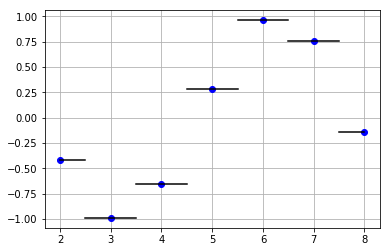

In [4]:
plt.plot(x, y, 'bo')
plt.grid(True)

dx = x[1] - x[0]
xsize = x.shape[0]
for i in range(xsize):
    xmin = x[i] if i == 0 else x[i] - dx/2
    xmax = x[i] if i == xsize - 1 else x[i] + dx/2
    plt.plot([xmin, xmax], [y[i], y[i]], 'k-')

### Implementação

Vamos implementar a função `constant()` que, dados os vetores $x$ e $y$, retorne o valor aproximado da função $f(x)$ para um valor arbitrário $x_0 \leq x_i \leq x_n$.

In [5]:
def constant(x, y, xi):
    """
    Encontrar o valor aproximado de f(xi) utilizando o método da interpolação constante.

    Args:
        x: pontos no eixo x.
        y: pontos no eixo y.
        xi: ponto onde deseja-se saber o valor de f(x).
    
    Returns:
        O valor aproximado de f(x) no ponto xi.
    """
    
    # Retorna -1 caso xi esteja fora do intervalo
    if xi < x[0] or xi > x[-1]:
        return -1
    
    nearest = (0, abs(xi-x[0]))
    xsize = x.shape[0]
    for i in range(xsize):
        if abs(xi - x[i]) < nearest[1]:
            nearest = (i, abs(xi - x[i]))
    
    return y[nearest[0]]

Agora utilizamos a função `constant()` para encontrar o valor de $f(\frac{3\pi}{2})$:

In [6]:
constant(x, y, 3*np.pi/2)

0.28366218546322625

## Interpolação Linear

A interpolação Linear é outro método bem simples de interpolação. Neste método, uma função interpolante é definida para cada dois pontos consecutivos, o interpolante é definido pela reta que liga os dois pontos.

Dados dois pontos consecutivos $(x_a, y_a)$ e $(x_b, y_b)$, definimos o interpolante como:

$$y = y_a + \frac{y_b - y_a}{x_b - x_a}(x - x_a)$$



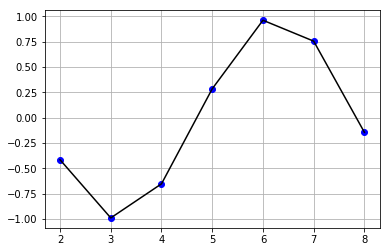

In [7]:
plt.grid(True)
plt.plot(x, y, 'bo')
plt.plot(x, y, 'k-')

### Implementação

Vamos implementar a função `linear()` que, dados os vetores $x$ e $y$, retorne o valor encontrado da função $f(x)$ para um valor arbitrário $x_0 \leq x_i \leq x_n$, utilizando o método da interpolação linear.

In [8]:
def linear(x, y, xi):
    """
    Encontrar o valor aproximado de f(xi) utilizando o método da interpolação linear.

    Args:
        x: pontos no eixo x.
        y: pontos no eixo y.
        xi: ponto onde deseja-se saber o valor de f(x).
    
    Returns:
        O valor aproximado de f(x) no ponto xi.
    """
    
    # Retorna -1 caso xi esteja fora do intervalo
    if xi < x[0] or xi > x[-1]:
        return -1
    
    idx = 0
    for i, e in enumerate(x):
        if e <= xi:
            idx = i
        else:
            break
    
    if x[idx] == x[-1]:
        return y[idx]
    
    return y[idx] + (xi - x[idx]) * (y[idx+1] - y[idx]) / (x[idx+1] - x[idx])

Sabemos que a nossa função $f(x)$ é $cos(x)$ e que $cos(\frac{3\pi}{2}) = 0$. Vamos utilizar as funções `constant()` e `linear()` para encontrar o valor de $f(\frac{3\pi}{2})$ e comparar os resultados:

In [9]:
print('constante:', constant(x, y, 3*np.pi/2))
print('linear:   ', linear(x, y, 3*np.pi/2))

constante: 0.283662185463
linear:    0.0140827068142


## Interpolação Polinomial

A Interpolação Polimonial consiste em encontrar um polinômio de ordem menor ou igual a $n$ que passe por um conjunto de $n+1$ pontos. Problema: dado um conjunto de $n+1$ pontos $(x_i, y_i)$, $0 \leq i \leq n$, com todos os $x_i$ diferentes, encontre um polinômio $P_n$ que passe por todos os $n+1$ pontos dados. Ou seja:

$$P_n(x_i) = y_i, 0 \leq i \leq n.$$

Este polinômio $P_n$ não só existe, como é único. Estudaremos três métodos para encontrá-lo:

- Polinômio de Vandermonde;
- Polinômio de Lagrange;
- Polinômio de Newton.

### Polinômio de Vandermonde

Esta é a forma mais intuitiva de se construir $P_n$. Dado o polinômio:

$$P_n(x) = C_0x^n + C_1x^{n-1} + ... + C_{n-1}x + C_n$$

Queremos encontrar todos os coeficientes $C_i$. Sabendo que $P_n(x_i) = y_i$, criamos o seguinte sistema de equações:

$$
\begin{cases}
y_0 = C_0x_0^n + C_1x_0^{n-1} + \cdots C_n \\
y_1 = C_0x_1^n + C_1x_1^{n-1} + \cdots C_n \\
\vdots \\
y_n = C_0x_n^n + C_1x_n^{n-1} + \cdots C_n \\
\end{cases}
$$

Reescrevendo-o em forma matricial, temos:

$$
\begin{bmatrix}
x_0^n & x_0^{n-1} & \cdots & x_0 & 1 \\
x_1^n & x_1^{n-1} & \cdots & x_1 & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_n^n & x_n^{n-1} & \cdots & x_n & 1
\end{bmatrix} .
\begin{bmatrix}
C_0 \\
C_1 \\
\vdots \\
C_n
\end{bmatrix} = 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{bmatrix}
$$

Tal matriz é chamada de matriz de Vandermonde. Para encontrar os coeficientes $C_i$ e assim $P_n$, basta resolver o sistema linear.

Vejamos a função `vandermonde_polynomial()`. Ela encontra os coeficientes do polinômio $P_n(x)$ a partir de $n+1$ pontos dados.

In [10]:
def vandermonde_polynomial (x, y):
    """
    Encontrar os coeficientes do polinômio de Vandermonde, dado um conjunto de pontos de entrada.

    Args:
        x: pontos no eixo x.
        y: pontos no eixo y.
    
    Returns:
        Os coeficientes do polinômio de Vandermonde calculados a partir dos pontos dados.
    """
    
    X = np.vander(x, x.shape[0])
    return np.linalg.solve(X, y)

### Polinômio de Lagrange

O polinômio de Lagrange é o método mais inteligente de se encontrar o polinômio $P_n$, por mais que este não seja tão intuitivo quanto o método de Vandermonde. O polinômio de Lagrange é o resultado da soma de $n+1$ polinômios, todos de grau $n$. Cada polinômio $P_i$ deve ser nulo em todos os pontos $x_j$, sempre que $j \neq i$. Ou seja,

$$
P_i(x_j) = 
\begin{cases}
0, & i \neq j, \\
y_i, & i = j. 
\end{cases}
$$

Podemos construir cada polinômio $P_i$ da seguinte forma:

$$ P_i(x) = y_i \frac{(x-x_0)(x-x_1)...(x-x_{i-1})(x-x_{i+1})...(x-x_n)}
                     {(x_i-x_0)(x_i-x_1)...(x_i-x_{i-1})(x_i-x_{i+1})...(x_i-x_n)} $$

É fácil ver que $P_i(x) = 0$ para todo $x = x_0, x_1, ..., x_{i-1}, x_{i+1}, ..., x_n$ e $P_i(x_i) = y_i$, satisfazendo assim, as condições acima.

O polinômio $P_n$ que queremos é dado pela soma de todos os $P_i(x), 0 \leq i \leq n$.

$$
P_n(x) = \sum_{i=0}^nP_i(x) =
y_0 \frac{(x-x_1)(x-x_2)...(x-x_n)}{(x_0-x_1)(x_0-x_2)...(x_0-x_n)} + 
y_1 \frac{(x-x_0)(x-x_2)...(x-x_n)}{(x_1-x_0)(x_1-x_2)...(x_1-x_n)} + ... +
y_n \frac{(x-x_0)...(x-x_{n-2})(x-x_{n-1})}{(x_n-x_0)...(x_n-x_{n-2})(x_n-x_{n-1})}
$$

A unicidade do polinômio interpolante garante que o polinômio de Lagrange é idêntico ao polinômio de Vandermonde que é o polinômio interpolante.

Vejamos a função `lagrange_polynomial()`. Ela encontra os coeficientes do polinômio $P_n(x)$ a partir de $n+1$ pontos dados.

In [11]:
from scipy import interpolate
def lagrange_polynomial (x, y):
    """
    Encontrar os coeficientes do polinômio de Lagrange, dado um conjunto de pontos de entrada.

    Args:
        x: pontos no eixo x.
        y: pontos no eixo y.
    
    Returns:
        Os coeficientes do polinômio de Lagrange calculados a partir dos pontos dados.
    """
    
    return interpolate.lagrange(x, y)

### Polinômio de Newton

Podemos escrever $P_n$ da forma:

$$ P_n(x) = C_0 + C_1(x - x_0) + C_2(x - x_0)(x - x_1) + ... + C_n(x - x_0)(x - x_1)...(x - x_{n-1}) $$

Desta forma, quando $x = x_0$, todos os termos $C_1 a C_n$ são anulados restando apenas $C_0$. Quando $x = x_1$, todos os termos $C_2 a C_n$ são anulados restando apenas $C_0 + C_1(x_1 - x_0)$ e assim por diante. De acordo com as propriedades de $P_n$, temos:

$$
\begin{cases}
y_0 = C_0 \\
y_1 = C_0 + C_1(x_1 - x_0) \\
\vdots = \vdots \\
y_n = C_0 + C_1(x_n - x_0) + ... + C_n(x_n - x_0)(x_n - x_1)...(x_n - x_{n-1})
\end{cases}
$$

É possível encontrar os coeficientes de $P_n$ resolvendo o seguinte sistema linear derivado do sistema acima:

$$
\begin{bmatrix}
1 & 0 & \cdots & 0 \\
1 & (x_1 - x_0) & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
1 & (x_n - x_0) & \cdots & (x_n - x_0)...(x_n - x_{n-1})
\end{bmatrix} .
\begin{bmatrix}
C_0 \\
C_1 \\
\vdots \\
C_n
\end{bmatrix} = 
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_n
\end{bmatrix}
$$

Vamos ver a função newton_polynomial(). Ela encontra os coeficientes do polinômio $P_n(x)$ a partir de $n+1$ pontos dados.

In [12]:
def newton_polynomial (x, y):
    """
    Encontrar os coeficientes do polinômio de Newton, dado um conjunto de pontos de entrada.

    Args:
        x: pontos no eixo x.
        y: pontos no eixo y.
    
    Returns:
        Os coeficientes do polinômio de Newton calculados a partir dos pontos dados.
    """
    
    return 0

### Resultados

Independente do método para encontrar o polinômio $P_n$, quando o número de pontos é muito elevado, encontrar o interpolante polinomial se torna proibitivo por conta de sua complexidade elevada. Outra desvantagem é que o comportamento de $P_n$ fora do intervalo $[x_0, x_n]$ é inesperado, podendo conter oscilações indesejadas.

Vamos definir uma função que, dados os coeficientes de um polinômio $P(x)$ e um valor de $x$ arbitrário, retorne o valor de $P(x)$. A função será utilizada em conjunto ao polinômio $P_n$ para encontrar o valor da função $f(x)$ para um valor arbitrário $x_0 \leq x \leq x_n$, utilizando o método da interpolação polinomial.

In [13]:
def polynomial (p, xi):
    """
    Dados os coeficientes de um polinômio P(x) de grau n = p.shape[0]-1, da forma:
        P(x) = p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1] * x + p[n]
    A função 'polynomial' retorna o valor de P(xi).

    Args:
        p: coeficientes do polinômio P(x).
        xi: ponto onde deseja-se saber o valor de P(x).
    
    Returns:
        O valor do polinômio P(x) no ponto xi.
    """
    
    pxi = 0
    degree = p.shape[0] - 1
    for i, coef in enumerate(p):
        pxi += coef * xi ** (degree - i)
    return pxi

Dado o conjunto de pontos $x$ e $y$ definidos acima, a interpolação polinomial gera o seguinte resultado:

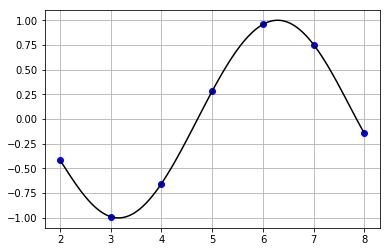

In [14]:
plt.grid(True)
plt.plot(x, y, 'bo')

p = vandermonde_polynomial(x, y)
# p = lagrange_polynomial(x, y)
# p = vandermonde_polynomial(x, y)

interpolated_x = np.linspace(2, 8, 100)
interpolated_y = []
for i in interpolated_x:
    interpolated_y += [polynomial(p, i)]
plt.plot(interpolated_x, interpolated_y, 'k-')

Vamos utilizar as funções `constant()`, `linear()` e `polynomial()` para encontrar novamente o valor de $f(\frac{3\pi}{2})$ e comparar os resultados:

In [15]:
print('constante: ', constant(x, y, 3*np.pi/2))
print('linear:    ', linear(x, y, 3*np.pi/2))
print('polinomial:', polynomial(vandermonde_polynomial(x, y), 3*np.pi/2))

constante:  0.283662185463
linear:     0.0140827068142
polinomial: 0.00145725967194


## Interpolação por Splines

Ao invés de construirmos um único polinômio para passar por todos os pontos, podemos construir polinômios locais em cada trecho do intervalo e então conectá-los. A ideia da interpolação por Splines é parecida com a interpolação linear, porém, utilizando polinômios cúbicos.

Problema: dada uma sequência de $n+1$ pontos $(x_0, y_0)$, $(x_1, y_1)$, ..., $(x_n, y_n)$ queremos encontrar $n$ polinômios cúbicos:

$$ g_i(x) = a_i(x-x_i)^3 + b_i(x-x_i)^2 + c_i(x-x_i) + d_i, i = 0, 1, ..., n $$

Tal que a função interpolante $g(x)$ seja dada por:

$$ g(x) = g_i(x), x_i \leq x \leq x_{i+1}. $$

Para que o interpolante seja suave em todo o intervalo, vamos impor que $g(x)$, $g'(x)$ e $g''(x)$ sejam contínuas em todo o intervalo. Essas funções são dadas por:

$$
\begin{cases}
g_i(x) = a_i(x-x_i)^3 + b_i(x-x_i)^2 + c_i(x-x_i) + d_i \\
g_i(x) = 3a_i(x-x_i)^2 + 2b_i(x-x_i) + c_i \\
g_i(x) = 6a_i(x-x_i) + 2b_i
\end{cases}
$$

Para que elas sejam contínuas em todo o intervalo, precisamos tratar os limites entre cada polinômio:

$$
\begin{cases}
g_i(x_i) = y_i, & i = 0, 1, ..., n-1 \\
g_i(x_{i+1}) = y_{i+1}, & i = 0, 1, ..., n-1 \\
g_i'(x_{i+1}) = g_{i+1}'(x_{i+1}), & i = 0, 1, ..., n-2 \\
g_i''(x_{i+1}) = g_{i+1}''(x_{i+1}), & i = 0, 1, ..., n-2
\end{cases}
$$

Com os limites definidos, temos $2n + 2(n-1) = 4n - 2$ igualdades, porém, temos $n$ funções $g_i$ com quatro coeficientes cada, em um total de $4n$ coeficientes. Uma estratégia para definir as duas igualdades restantes é impor o valor de $g'(x)$ nos pontos $x_0$ e $x_n$.

$$
\begin{cases}
g_0'(x_0) = 0 \\
g_{n-1}'(x_n) = 0
\end{cases}
$$

Agora temos um problema com $4n$ coeficientes e $4n$ igualdades. Vamos começar encontrando os coeficientes $d_i$: por definição, $g_i(x_i) = y_i$, porém, ao substituirmos $x_i$ em $g_i(x)$, temos: $g_i(x_i) = d_i$. Desta forma:

$$ d_i = y_i, i = 0, 1, ..., n-1 $$

O que encontra diretamente todos os coeficientes $d$.

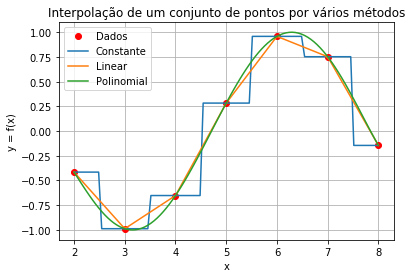

In [16]:
# Validação das funções implementadas
plt.plot(x, y, 'ro')
a = np.linspace(2, 8, 100)

b = []
for i in a:
    b += [constant(x, y, i)]
plt.plot(a, b)

b = []
for i in a:
    b += [linear(x, y, i)]
plt.plot(a, b)

b = []
p = vandermonde_polynomial(x, y)
for i in a:
    b += [polynomial(p, i)]
plt.plot(a, b)

plt.title('Interpolação de um conjunto de pontos por vários métodos')
plt.legend(['Dados', 'Constante', 'Linear', 'Polinomial', 'Splines'])
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.grid(True)